# Working with a larger Example
When you have more than two classes as an option, it's know as a **multi-class classification problem**.

* This means if you have 3 classes, it's multi-class classification with 3 classes.
* It also means if you have 100 classes, it's multi-class classification with 100 classes.

To practice multi-class classification, we're going to build a neural network to classify images of clothing, like sneakers and shirts.

Dataset: [Fashion MNIST](http://tensorflow.org/datasets/catalog/fashion_mnist)

In [15]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been split into training and testing sets
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [16]:
# show the first test image
print(train_data[0])
print(train_labels[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [17]:
# check the shape of the data
train_data[0].shape, train_labels[0].shape

((28, 28), ())

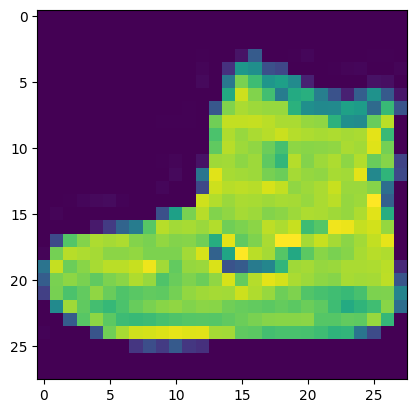

In [18]:
# Plot a single image
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [19]:
# Create a small list of class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Text(0.5, 1.0, 'Sandal')

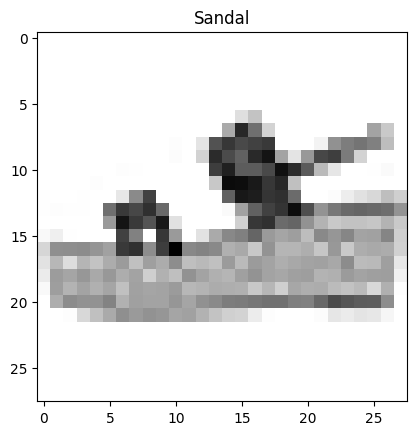

In [20]:
# Plot a single image with a class name
index_to_plot = 12
plt.imshow(train_data[index_to_plot], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_to_plot]])

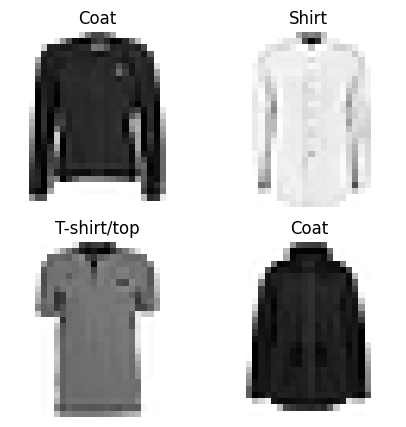

In [21]:
# Plot multiple random images
import random
plt.figure(figsize=(5,5))
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

## Building a multi-class classification model

For multi-class classification, we can use a similar model to the binary classifier, however, we'll need to make a few changes.

* Input shape = 28x28 (the shape of the image)
* Output shape = 10 (the number of classes we're trying to predict)
* Loss function = `CategoricalCrossentorpy()` with one-hot encoded labels or `SparseCategoricalCrossentropy()` with integer labels
* Output layer activation = `softmax` (because we want the output layer to output a probability distribution)

In [22]:
flatten_layer = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28))
])
flatten_layer.output_shape

(None, 784)

In [23]:
tf.one_hot(train_labels[:10], depth=10)

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [24]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
non_norm_history = model_1.fit(train_data,
                               tf.one_hot(train_labels, depth=10),
                               epochs=15,
                               validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 2.0872 - accuracy: 0.2108 - val_loss: 1.8822 - val_accuracy: 0.2407
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7776 - accuracy: 0.2841 - val_loss: 1.7269 - val_accuracy: 0.2801
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5739 - accuracy: 0.3300 - val_loss: 1.5102 - val_accuracy: 0.3251
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4845 - accuracy: 0.3390 - val_loss: 1.4619 - val_accuracy: 0.3384
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4479 - accuracy: 0.3440 - val_loss: 1.4160 - val_accuracy: 0.3642
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3989 - accuracy: 0.3820 - val_loss: 1.4907 - val_accuracy: 0.3361
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3769 - accuracy: 0.3835 - val_loss: 1.3591 - val_accuracy:

In [25]:
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 4)                 3140      
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


# Check the min and max values of the training data

In [26]:
train_data.min(), train_data.max()

(0, 255)

Neural networks work best when the data is normalized (all values are between 0 and 1).

In [27]:
# We can normalize our data by dividing it by the maximum value
train_data_norm = train_data / train_data.max()
test_data_norm = test_data / test_data.max()

# Check the min and max values of the normalized training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [30]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

norm_history = model_2.fit(train_data_norm,
                           tf.one_hot(train_labels, depth=10),
                           epochs=15,
                           validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10)))

Epoch 1/15
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1432 - accuracy: 0.5847 - val_loss: 0.7959 - val_accuracy: 0.7138
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7209 - accuracy: 0.7454 - val_loss: 0.6933 - val_accuracy: 0.7454
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6585 - accuracy: 0.7625 - val_loss: 0.6557 - val_accuracy: 0.7628
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6283 - accuracy: 0.7743 - val_loss: 0.6362 - val_accuracy: 0.7726
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6121 - accuracy: 0.7810 - val_loss: 0.6330 - val_accuracy: 0.7717
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6009 - accuracy: 0.7841 - val_loss: 0.6240 - val_accuracy: 0.7787
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5932 - accuracy: 0.7866 - val_loss: 0.6364 - val_accuracy:

<AxesSubplot: title={'center': 'non_norm_history data'}>

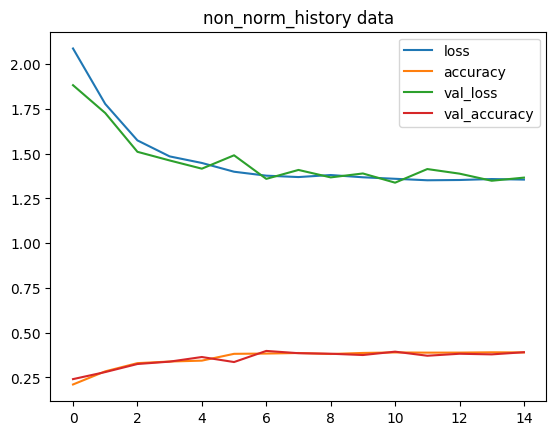

In [33]:
# plot non-normalized data loss curves
import pandas as pd
pd.DataFrame(non_norm_history.history).plot(title="non_norm_history data")

<AxesSubplot: title={'center': 'Normalized data'}>

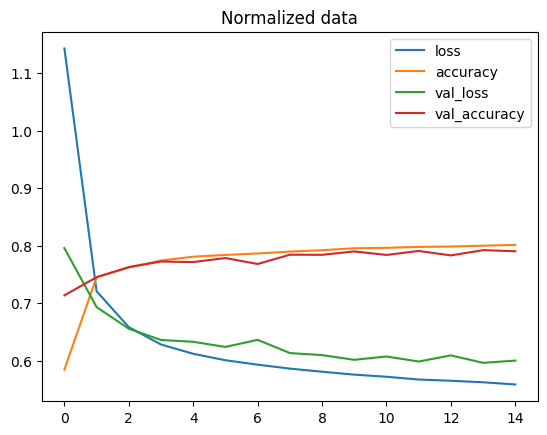

In [34]:
pd.DataFrame(norm_history.history).plot(title="Normalized data")

🔑 **Note:** The same model with event **slightly** different data can produce *dramatically* different results. So when you are comparing models, it's important to make sure you're comparing them on the same criteria (same data but different architecture, same architecture but different data, etc).

## Finding the ideal learning rate

When training a neural network, the ideal learning rate is the learning rate where the model's training loss decreases the most rapidly.

In [35]:
# Set random seed
tf.random.set_seed(42)
# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])
# 2. Compile the model
model_3.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch / 20)) # every 20 epochs, multiply the learning rate by 10

# 4. Fit the model
find_lr_history = model_3.fit(train_data_norm,
                              tf.one_hot(train_labels, depth=10),
                              epochs=40,
                              callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1025 - accuracy: 0.1754 - lr: 1.0000e-04
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7767 - accuracy: 0.2998 - lr: 1.1220e-04
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5975 - accuracy: 0.3371 - lr: 1.2589e-04
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 1.2757 - accuracy: 0.4586 - lr: 1.4125e-04
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0647 - accuracy: 0.5487 - lr: 1.5849e-04
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9377 - accuracy: 0.6263 - lr: 1.7783e-04
Epoch 7/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8721 - accuracy: 0.6742 - lr: 1.9953e-04
Epoch 8/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8265 - accuracy: 0.6939 - lr: 2.2387e-04
Epoch 9/40
1875/1875 [==========================

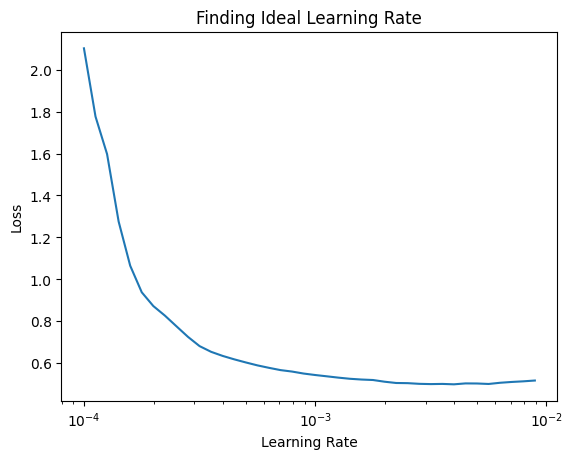

In [37]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-4 * (10 ** (np.arange(40) / 20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding Ideal Learning Rate")
plt.show()

In [39]:
10e-4

0.001

In [42]:
# Let fit a model with the ideal learning rate
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=10e-4),
                metrics=["accuracy"])

# 3. Fit the model

model_4.fit(train_data_norm,
            tf.one_hot(train_labels, depth=10),
            epochs=20,
            validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10)))

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.3052 - accuracy: 0.5003 - val_loss: 1.0061 - val_accuracy: 0.6065
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8209 - accuracy: 0.6966 - val_loss: 0.7230 - val_accuracy: 0.7191
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6711 - accuracy: 0.7233 - val_loss: 0.6830 - val_accuracy: 0.7207
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6365 - accuracy: 0.7324 - val_loss: 0.6500 - val_accuracy: 0.7285
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6179 - accuracy: 0.7428 - val_loss: 0.6296 - val_accuracy: 0.7369
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5954 - accuracy: 0.7669 - val_loss: 0.6291 - val_accuracy: 0.7715
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5740 - accuracy: 0.7864 - val_loss: 0.6375 - val_accuracy: